<a href="https://colab.research.google.com/github/madonnaojorin/MAT343_Linear_Algebra/blob/main/6-2_Kernel_and_Range_of_LT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6.2. The Kernel and Range of a Linear Transformation


In [2]:
install.packages("pracma")
library(pracma)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘htmlwidgets’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘xtable’, ‘rgl’, ‘car’


Warning message in install.packages("matlib"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("matlib"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("matlib"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("matlib"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("matlib"):
“installation of package ‘matlib’ had non-zero exit status”


ERROR: ignored

##Definition of Kernel of a Linear Transformation

Let $T:V\to W$ be a linear transformation. Then the set of all vectors $\textbf{v}$ in $V$ that satisfy $T(\textbf{v})=\textbf{0}$ is the **kernel** of $T$ and is denoted by $\ker (T)$.

####$\star$Example
Let $T:\mathbb{R}^2\to\mathbb{R}^2$ be the linear transformation $$T(\textbf{x})=\begin{bmatrix}1&3\\2&6\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}.$$ What are all of the vectors in the domain whose transformations map to the subset $S=\left\{\begin{bmatrix}0\\0\end{bmatrix}\right\}$? That is, what is the preimage of S?

\begin{align*}
\text{Preimage of }S \text{ under } T
&= \{\textbf{x}\in\mathbb{R}^2|T(\textbf{x})\in S\}\\
&= \{\textbf{x}\in\mathbb{R}^2|A\textbf{x}=\begin{bmatrix}0&0\end{bmatrix}^T\}\\
\end{align*}

So, we want to find $x_1$ and $x_2$ that satisfies $$\begin{bmatrix}1&3\\2&6\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix}$$
(Computation is shown below.)
$$\begin{bmatrix}x_1\\x_2\end{bmatrix}=t\begin{bmatrix}-3\\1\end{bmatrix}$$
where $t\in\mathbb{R}$.

Let's define a set $S'=\left.\left\{t\begin{bmatrix}-3\\1\end{bmatrix}\right\vert t\in\mathbb{R}\right\}$, then 
$$T(S')=\{\textbf{0}\}$$
This is equivalent to the nullspace.  The nullspace of a matrix is all the vectors that if we multiply it by that matrix, then we get 0. 
**Kernel** is the similar idea. The transformation $T$ is defined by a matrix, and our objective is to find the $x$ that gives us zero vector when transforming them. 

So, $$\text{ker}(T)=\left\{\textbf{x}\in\mathbb{R}^2|T(\textbf{x})=\{\textbf{0}\}\right\}=\left\{\left.t\begin{bmatrix}-3\\1\end{bmatrix}\right\vert t\in\mathbb{R}\right\}$$

$\begin{bmatrix}-3\\1\end{bmatrix}$ is the basis of ker$(T)$, that means, the kernel is a one-dimensional subset of $\mathbb{R}^2$.



1,3
2,6


1,3
0,0


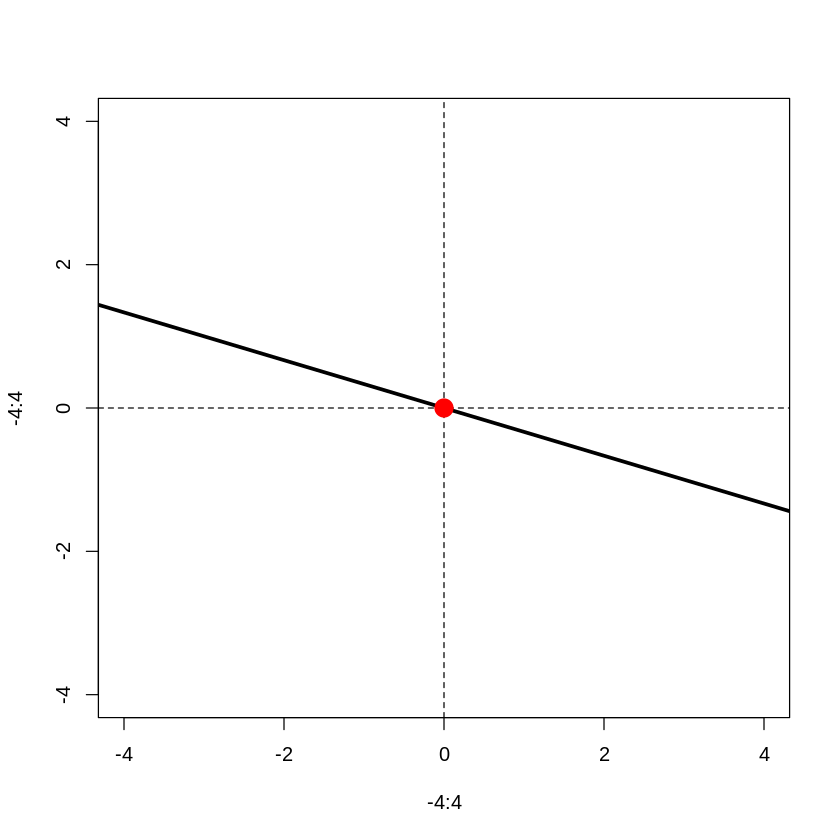

In [20]:
(A <- matrix(c(1,3,2,6), 2, 2, byrow = TRUE))
rref(A)
plot(-4:4, -4:4, type = "n") # setting up coord. system
abline(0,-1/3, col = "black", lwd = 3)
abline(v=0, lty=2)
abline(h=0, lty=2)
points(0,0,col="red",pch = 19, cex = 2)

####$\star$Example
Let $T:M_{3,2}\to M_{2,3}$ be the linear transformation that maps a $3\times 2$ matrix $A$ to its transpose. That is, $T(A)=A^T$. Find the kernel of $T$.

**Solution**

For this linear transformation, the $3\times2$ zero matrix is clearly the only matrix in $M_{3,2}$ whose transpose is the zero matrix in  $M_{2,3}$. 
$$T(A)=A^T=\textbf{0}=\begin{bmatrix}0&0&0\\0&0&0\end{bmatrix}$$
So, the kernel of $T$ consists of a single element: the zero matrix in $M_{3,2}$.



####$\star$Example
Find the kernel of the projection $T:\mathbb{R}^3\to\mathbb{R}^3$ represented by $T(\langle x,y,z\rangle)=\langle x,y,0\rangle$.

**Solution**
This linear transformation projects the vector $\langle x,y,z\rangle$ in $\mathbb{R}^3$ to the vector $\langle x,y,0\rangle$ in the  xy-plane. The kernel consists of all vectors lying on the  z-axis. That is,

$$\text{ker}(T)=\left\{\langle x,y,z\rangle\in\mathbb{R}^3|T(\langle x,y,z\rangle)=\langle x,y,0\rangle=\{\textbf{0}\}\right\}=\{\langle 0,0,z\rangle: z \text{ is a real number}\}.$$




###Theorem 6.3: The Kernel Is a Subspace of $V$
The kernel of a linear transformation $T:V\to W$ is a subspace of the domain $V$.


####$\star$Example
Define $T:\mathbb{R}^5\to\mathbb{R}^4$ by $T(\textbf{x}=A\textbf{x}$, where \textbf{x} is in $\mathbb{R}^5$ and
$$A=\begin{bmatrix}1&2&0&1&-1\\2&1&3&1&0\\-1&0&-2&0&1\\0&0&0&2&8\end{bmatrix}$$
Find a basis for ker$(T)$ as a subspace of $\mathbb{R}^5$.


In [22]:
(A <- matrix(c(1,2,0,1,-1,2,1,3,1,0,-1,0,-2,0,1,0,0,0,2,8), 4,5, byrow = TRUE))
rref(A)

1,2,0,1,-1
2,1,3,1,0
-1,0,-2,0,1
0,0,0,2,8


1,0,2,0,-1
0,1,-1,0,-2
0,0,0,1,4
0,0,0,0,0


Thus,
\begin{align*}
x_1&=-2x_3+x_5\\
x_2&=\:\:\:\:\:\:x_3+2x_5\\
x_4&=\:\:\:\:\:\:\:\:\:\:\:\:\:-4x_5
\end{align*}
Letting $x_3=s$ and $x_5=t$, 
\begin{align*}\textbf{x}&=\begin{bmatrix}x_1\\x_2\\x_3\\x_4\\x_5\end{bmatrix}\\
&=\begin{bmatrix}-2s+t\\s+2t\\s+0t\\0s-4t\\0s+t\end{bmatrix}\\
&=s\begin{bmatrix}-2\\1\\1\\0\\0\end{bmatrix}+t\begin{bmatrix}1\\2\\0\\-4\\1\end{bmatrix}
\end{align*}

So, a basis for the kernel of $T$ is $B=\{\langle-2,1,1,0,0\rangle,\langle1,2,0,-4,1\rangle\}$

Again, a basis for the kernel of $T$ was found by solving the homogeneous system represented by $A\textbf{x}=\textbf{0}$. This procedure is the same procedure used to find the nullspace of $A$. In other words, the kernel of $T$ is the solution space of $A\textbf{x}=\textbf{0}$, as stated in the corollary to Theorem 6.3 below.

###Theorem 6.3: Corollary
Let $T:\mathbb{R}^n\to\mathbb{R}^m$ be the linear transformation $T(\textbf{x})=A\textbf{x}$.
Then the kernel of $T$ is equal to the solution space of $A\textbf{x}=\textbf{0}$.



---

The kernel is one of two critical subspaces associated with a linear transformation. The other is the range of $T$, denoted by range range$(T)$. Recall
$$\text{range}(T)=\{T(\textbf{v}): \textbf{v}\in V\}$$



###Theorem 6.4: The Range of $T$ Is a Subspace of $W$
The range of a linear transformation $T:V\to W$ is a subspace of $W$.

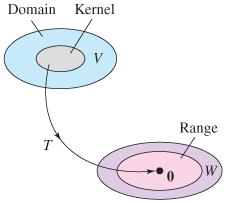

###Theorem 6.4: Corollary
Let $T:\mathbb{R}^n\to\mathbb{R}^m$ be the linear transformation $T(\textbf{x})=A\textbf{x}$.
Then the column space of $A$ is equal to the range of $T$.


####$\star$Example 
For the linear transformation $T:\mathbb{R}^5\to\mathbb{R}^4$ from the previous example, find a basis for the range of $T$.

**Solution:**

The leading 1s appear in columns 1, 2, and 4 of the reduced matrix on the right, so the corresponding column vectors of $A$ form a basis for the column space of $A$. A basis for the range of $T$ is $$B=\{⟨1,2,-1,0⟩,⟨2,1,0,0⟩,⟨1,1,0,2⟩\}.$$



##Definition of Rank and Nullity of a Linear Transformation

Let $T:V\to W$ be a linear transformation. The dimension of the kernel of $T$ is called the **nullity** of $T$ and is denoted by **nullity**$(T)$. The dimension of the range of $T$ is called the **rank** of $T$ and is denoted by **rank**$(T)$.

###Theorem 6.5: Sum of Rank and Nullity
Let $T:V\to W$ be a linear transformation from an $n$-dimensional vector space $V$ into a vector space $W$. Then the sum of the dimensions of the range and kernel is equal to the dimension of the domain. That is,
$$\text{rank}(T)+\text{nullity}(T)=n$$
or
$$\dim (\text{range})+\dim (\text{kernel})=\dim(\text{domain}).$$

####$\star$Example
Find the rank and nullity of the linear transformation $T:\mathbb{R}^3\to\mathbb{R}^3$ defined by the matrix
$$A=\begin{bmatrix}1&0&-2\\0&1&1\\0&0&0\end{bmatrix}$$

**Solution:**

$A$ is in reduced row-echelon form and has two nonzero rows, so it has a rank of 2. This means that the rank of $T$ is also 2, and the nullity is $dim(domain)-rank=3-2=1.$



####$\star$Example
Let $T:\mathbb{R}^5\to\mathbb{R}^7$ be a linear transformation.

1. Find the dimension of the kernel of $T$ when the dimension of the range is 2.
2. Find the rank of $T$ when the nullity of $T$ is 4.
3. Find the rank of $T$ when **ker**$(T)=\{\textbf{0}\}$.

**Solution:**

1. By Theorem 6.5, with $n=5$, 
$$\text{dim(kernel)}=n-\text{dim(range)}=5-2=3$$


2. By Theorem 6.5, with $n=5$, 
$$\text{rank(T)}=n-\text{nullity(T)}=5-4=1$$


3. The nullity of $T$ is 0. So, 
$$\text{rank(T)}=n-\text{nullity(T)}=5-0=5$$



###Theorem 6.6: One-to-One Linear Transformations
Let $T:V\to W$ be a linear transformation. Then $T$ is one-to-one if and only if $\text{ker}(T)=\{\textbf{0}\}$.


###Theorem 6.7: Onto Linear Transformations
Let $T:V\to W$ be a linear transformation, where $W$ is finite dimensional. Then $T$ is onto if and only if the rank of $T$ is equal to the dimension of $W$.

###Theorem 6.8: One-to-One and Onto Linear Transformations
Let $T:V\to W$ be a linear transformation with vector spaces $V$ and $W$, both of dimension $n$. Then $T$ is one-to-one if and only if it is onto.

##Definition: Isomorphism
A linear transformation $T:V\to W$  that is one-to-one and onto is called an **isomorphism**. Moreover, if $V$ and $W$ are vector spaces such that there exists an isomorphism from $V$ to $W$, then $V$ and $W$ are isomorphic to each other.

###Theorem 6.9: Isomorphic Spaces and Dimension
Two finite-dimensional vector spaces $V$ and $W$ are isomorphic if and only if they are of the same dimension.
